In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import boston_housing

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

In [12]:
(train_data, train_target), (test_data, test_target) = boston_housing.load_data()

print('train_data.shape', train_data.shape)
print('test_data.shape ', test_data.shape)

train_data.shape (404, 13)
test_data.shape  (102, 13)


In [13]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

train_df = pd.DataFrame(train_data, columns=column_names)
train_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65


In [14]:
scaler = MinMaxScaler((-1, 1))
X_train = scaler.fit_transform(train_data)
X_test = scaler.transform(test_data)

X_train

array([[-0.97243674, -1.        , -0.43695015, ...,  0.78723404,
         1.        , -0.06236203],
       [-0.99965269,  0.65      , -0.88489736, ..., -0.55319149,
         0.99233446, -0.92384106],
       [-0.89003245, -1.        ,  0.29325513, ...,  0.61702128,
         0.89217812, -0.91556291],
       ...,
       [-0.99936293, -0.3       , -0.58944282, ..., -0.08510638,
         0.82525594, -0.66335541],
       [-0.95182954, -1.        ,  0.40175953, ..., -0.55319149,
         0.31943114, -0.22406181],
       [-0.99981859,  0.2       , -0.81891496, ..., -0.36170213,
         0.898129  , -0.85375276]])

# Задание 1

### Модель 1.  
- Функция активации - relu  
- Количество слоев - 2
- Оптимизацтор - Adam
- Число нейронов в скрытом слое - [20, 30, 40, 50]

Epoch 1/150
3/3 [==============================] - 1s 192ms/step - loss: 570.6598 - mse: 570.6598 - val_loss: 661.8361 - val_mse: 661.8361
Epoch 2/150
3/3 [==============================] - 0s 11ms/step - loss: 567.4549 - mse: 567.4549 - val_loss: 658.3995 - val_mse: 658.3995
Epoch 3/150
3/3 [==============================] - 0s 12ms/step - loss: 564.2596 - mse: 564.2596 - val_loss: 655.0486 - val_mse: 655.0486
Epoch 4/150
3/3 [==============================] - 0s 12ms/step - loss: 561.1052 - mse: 561.1052 - val_loss: 651.7601 - val_mse: 651.7601
Epoch 5/150
3/3 [==============================] - 0s 12ms/step - loss: 558.1060 - mse: 558.1060 - val_loss: 648.5490 - val_mse: 648.5490
Epoch 6/150
3/3 [==============================] - 0s 13ms/step - loss: 555.0858 - mse: 555.0858 - val_loss: 645.4141 - val_mse: 645.4141
Epoch 7/150
3/3 [==============================] - 0s 10ms/step - loss: 552.1833 - mse: 552.1833 - val_loss: 642.3393 - val_mse: 642.3393
Epoch 8/150
3/3 [================

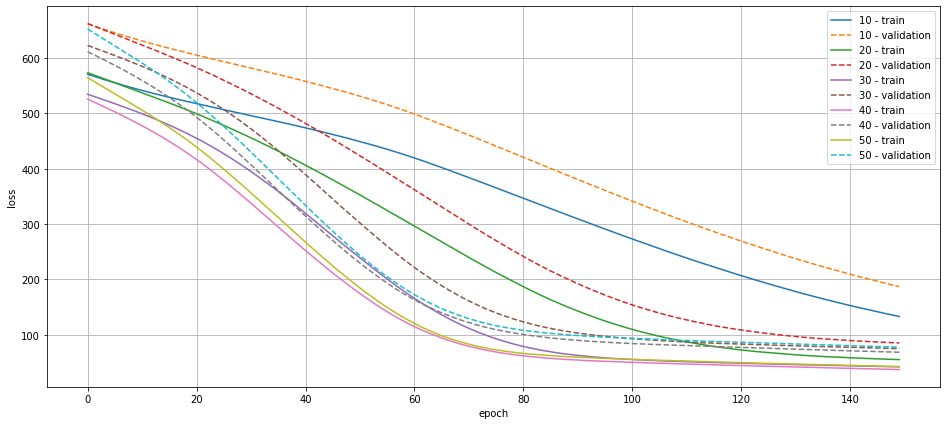

In [29]:
plt.figure(figsize=(16,7))

epochs = 150

result = []

for neuron_num in [10, 20, 30, 40, 50]:
  
  # Build the model.
  model = Sequential([ Dense(neuron_num, 
                             activation='relu', 
                             input_shape=(13,)),
                       Dense(1, 
                             activation='linear')])

  # Compile the model.
  model.compile(
      optimizer='adam',
      loss='mse',
      metrics=['mse'],
  )

  # Train the model.
  history = model.fit(
      X_train,
      train_target,
      epochs=epochs,
      batch_size=120, 
      validation_split=0.3
  )

  # результаты
  model_name = f'Model of {neuron_num} neurons'
  model_metric = history.history['mse'][epochs-1]
  model_val_metric = history.history['val_mse'][epochs-1]
  
  result.append([model_name, model_metric, model_val_metric])


  plt.plot(np.arange(epochs), history.history['loss'],    '-',  label = f'{neuron_num} - train')
  plt.plot(np.arange(epochs), history.history['val_loss'],'--', label = f'{neuron_num} - validation')
  
plt.legend()
plt.grid('On')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

Примечательн, что потребовалось сравнительно много итераций для выхода ошибки на пологий уровень

In [32]:
result_table = pd.DataFrame(result, columns=['model_name', 'model_metric', 'model_val_metric']).sort_values('model_val_metric', ascending=True)
result_table.head(5)

,model_name,model_metric,model_val_metric
3,Model of 40 neurons,36.976357,68.174019
2,Model of 30 neurons,41.772179,74.744232
4,Model of 50 neurons,42.277245,77.330986
1,Model of 20 neurons,54.887505,84.925011
0,Model of 10 neurons,132.769287,186.753571


### Модель 2.  
- Функция активации - relu  
- Количество слоев - [2, 3, 5, 10]
- Оптимизацтор - Adam
- Число нейронов в скрытом слое - 40

Epoch 1/150
3/3 [==============================] - 1s 195ms/step - loss: 566.0082 - mse: 566.0082 - val_loss: 656.9844 - val_mse: 656.9844
Epoch 2/150
3/3 [==============================] - 0s 11ms/step - loss: 562.1993 - mse: 562.1992 - val_loss: 652.8769 - val_mse: 652.8769
Epoch 3/150
3/3 [==============================] - 0s 15ms/step - loss: 558.3597 - mse: 558.3597 - val_loss: 648.8096 - val_mse: 648.8096
Epoch 4/150
3/3 [==============================] - 0s 13ms/step - loss: 554.6169 - mse: 554.6169 - val_loss: 644.7677 - val_mse: 644.7677
Epoch 5/150
3/3 [==============================] - 0s 11ms/step - loss: 550.8686 - mse: 550.8686 - val_loss: 640.7892 - val_mse: 640.7892
Epoch 6/150
3/3 [==============================] - 0s 10ms/step - loss: 547.1562 - mse: 547.1562 - val_loss: 636.8292 - val_mse: 636.8292
Epoch 7/150
3/3 [==============================] - 0s 11ms/step - loss: 543.4691 - mse: 543.4691 - val_loss: 632.8592 - val_mse: 632.8592
Epoch 8/150
3/3 [================

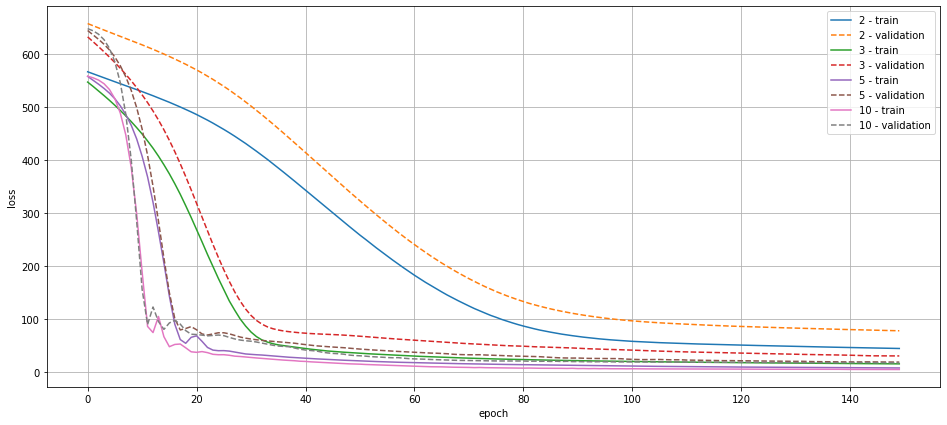

In [41]:
plt.figure(figsize=(16,7))

epochs = 150

result = []

neuron_num = 40

for layers_num in [2, 3, 5, 10]:

  layers_ = [Dense(neuron_num, activation='relu', input_shape=(13,))]
  for l in range(layers_num-2):
    layers_.append(Dense(neuron_num, activation='relu'))
  layers_.append(Dense(1, activation='linear'))
  
  # Build the model.
  model = Sequential(layers_)

  # Compile the model.
  model.compile(
      optimizer='adam',
      loss='mse',
      metrics=['mse'],
  )

  # Train the model.
  history = model.fit(
      X_train,
      train_target,
      epochs=epochs,
      batch_size=120, 
      validation_split=0.3
  )

  # результаты
  model_name = f'Model with {layers_num} layers'
  model_metric = history.history['mse'][epochs-1]
  model_val_metric = history.history['val_mse'][epochs-1]
  
  result.append([model_name, model_metric, model_val_metric])


  plt.plot(np.arange(epochs), history.history['loss'],    '-',  label = f'{layers_num} - train')
  plt.plot(np.arange(epochs), history.history['val_loss'],'--', label = f'{layers_num} - validation')
  
plt.legend()
plt.grid('On')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [40]:
result_table = pd.DataFrame(result, columns=['model_name', 'model_metric', 'model_val_metric']).sort_values('model_val_metric', ascending=True)
result_table.head(5)

,model_name,model_metric,model_val_metric
3,Model with 10 layers,3.599020,14.390500
2,Model with 5 layers,7.024594,18.999372
1,Model with 3 layers,15.445136,34.465717
0,Model with 2 layers,40.413589,72.410492


В данном случае наибольшее количество слоев показало наилучший результат. Стоит заметить, что график потерь модели из 10 слоев, не всегда монотонен 

### Модель 3.  
- Функция активации - relu  
- Количество слоев - 10
- Оптимизацтор - ['adam', 'sgd', 'rmsprop']
- Число нейронов в скрытом слое - 40

Epoch 1/150
3/3 [==============================] - 1s 85ms/step - loss: 557.6686 - mse: 557.6686 - val_loss: 647.6246 - val_mse: 647.6246
Epoch 2/150
3/3 [==============================] - 0s 23ms/step - loss: 554.7921 - mse: 554.7921 - val_loss: 643.7339 - val_mse: 643.7339
Epoch 3/150
3/3 [==============================] - 0s 12ms/step - loss: 550.7382 - mse: 550.7382 - val_loss: 637.8228 - val_mse: 637.8228
Epoch 4/150
3/3 [==============================] - 0s 11ms/step - loss: 544.3304 - mse: 544.3304 - val_loss: 628.3714 - val_mse: 628.3714
Epoch 5/150
3/3 [==============================] - 0s 11ms/step - loss: 534.2313 - mse: 534.2313 - val_loss: 613.2899 - val_mse: 613.2899
Epoch 6/150
3/3 [==============================] - 0s 12ms/step - loss: 518.0254 - mse: 518.0254 - val_loss: 589.3873 - val_mse: 589.3873
Epoch 7/150
3/3 [==============================] - 0s 11ms/step - loss: 492.7054 - mse: 492.7054 - val_loss: 551.8351 - val_mse: 551.8351
Epoch 8/150
3/3 [=================

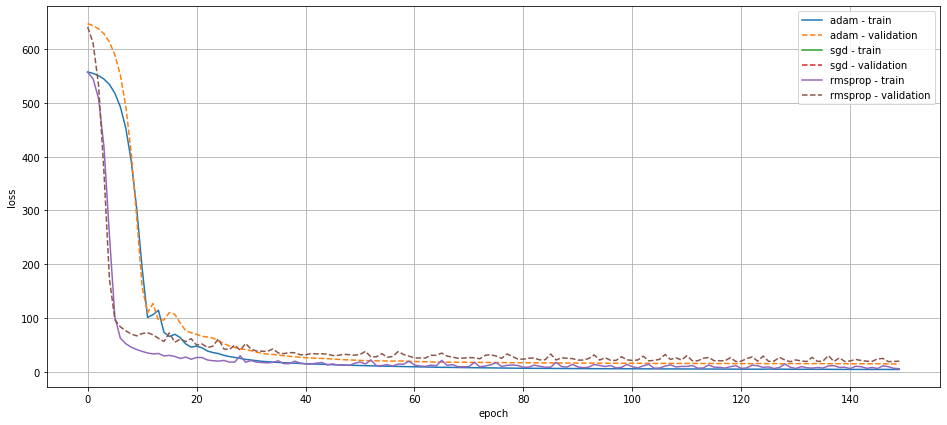

In [42]:
plt.figure(figsize=(16,7))

epochs = 150

result = []

neuron_num = 40
layers_num = 10

optimizers = ['adam', 'sgd', 'rmsprop']

for opt in optimizers:

  layers_ = [Dense(neuron_num, activation='relu', input_shape=(13,))]
  for l in range(layers_num-2):
    layers_.append(Dense(neuron_num, activation='relu'))
  layers_.append(Dense(1, activation='linear'))
  
  # Build the model.
  model = Sequential(layers_)

  # Compile the model.
  model.compile(
      optimizer=opt,
      loss='mse',
      metrics=['mse'],
  )

  # Train the model.
  history = model.fit(
      X_train,
      train_target,
      epochs=epochs,
      batch_size=120, 
      validation_split=0.3
  )

  # результаты
  model_name = f'Model with {opt} layers'
  model_metric = history.history['mse'][epochs-1]
  model_val_metric = history.history['val_mse'][epochs-1]
  
  result.append([model_name, model_metric, model_val_metric])


  plt.plot(np.arange(epochs), history.history['loss'],    '-',  label = f'{opt} - train')
  plt.plot(np.arange(epochs), history.history['val_loss'],'--', label = f'{opt} - validation')
  
plt.legend()
plt.grid('On')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [43]:
result_table = pd.DataFrame(result, columns=['model_name', 'model_metric', 'model_val_metric']).sort_values('model_val_metric', ascending=True)
result_table.head(5)

,model_name,model_metric,model_val_metric
0,Model with adam layers,3.956382,14.313788
2,Model with rmsprop layers,5.362745,19.450869
1,Model with sgd layers,NaN,NaN


В начале обучение меньшую ошибку дает оптимайзер rmsprop, однако затем лучший результат показывает adam 

### Модель 4.  
- Функция активации - ['relu', 'tanh', 'linear', 'sigmoid']  
- Количество слоев - 10
- Оптимизацтор - adam
- Число нейронов в скрытом слое - 40

Epoch 1/150
3/3 [==============================] - 1s 88ms/step - loss: 558.5294 - mse: 558.5294 - val_loss: 648.1313 - val_mse: 648.1313
Epoch 2/150
3/3 [==============================] - 0s 12ms/step - loss: 555.3703 - mse: 555.3703 - val_loss: 644.3447 - val_mse: 644.3447
Epoch 3/150
3/3 [==============================] - 0s 11ms/step - loss: 551.3383 - mse: 551.3383 - val_loss: 638.2364 - val_mse: 638.2364
Epoch 4/150
3/3 [==============================] - 0s 12ms/step - loss: 544.9484 - mse: 544.9483 - val_loss: 628.9442 - val_mse: 628.9442
Epoch 5/150
3/3 [==============================] - 0s 11ms/step - loss: 535.1110 - mse: 535.1110 - val_loss: 614.1116 - val_mse: 614.1116
Epoch 6/150
3/3 [==============================] - 0s 11ms/step - loss: 519.5068 - mse: 519.5068 - val_loss: 590.5449 - val_mse: 590.5449
Epoch 7/150
3/3 [==============================] - 0s 13ms/step - loss: 494.9602 - mse: 494.9602 - val_loss: 553.2960 - val_mse: 553.2960
Epoch 8/150
3/3 [=================

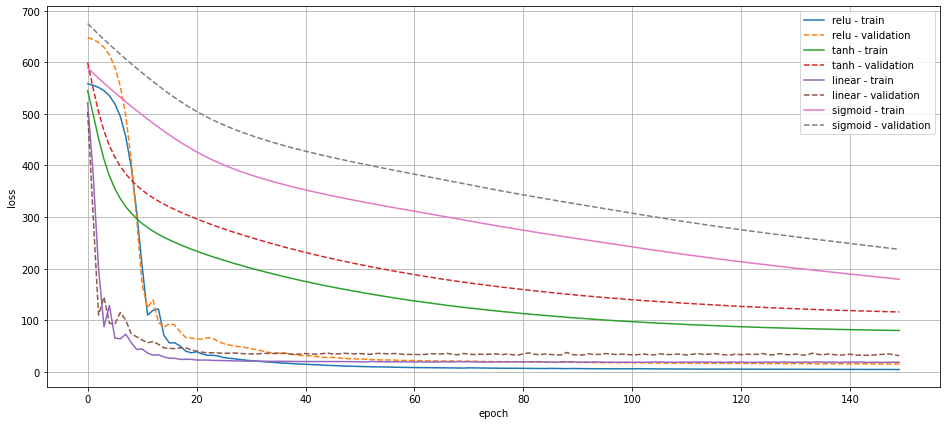

In [45]:
plt.figure(figsize=(16,7))

epochs = 150

result = []

neuron_num = 40
layers_num = 10
opt = 'adam'

activations = ['relu', 'tanh', 'linear', 'sigmoid']

for act in activations:

  layers_ = [Dense(neuron_num, activation=act, input_shape=(13,))]
  for l in range(layers_num-2):
    layers_.append(Dense(neuron_num, activation=act))
  layers_.append(Dense(1, activation='linear'))
  
  # Build the model.
  model = Sequential(layers_)

  # Compile the model.
  model.compile(
      optimizer=opt,
      loss='mse',
      metrics=['mse'],
  )

  # Train the model.
  history = model.fit(
      X_train,
      train_target,
      epochs=epochs,
      batch_size=120, 
      validation_split=0.3
  )

  # результаты
  model_name = f'Model with {act} activation'
  model_metric = history.history['mse'][epochs-1]
  model_val_metric = history.history['val_mse'][epochs-1]
  
  result.append([model_name, model_metric, model_val_metric])


  plt.plot(np.arange(epochs), history.history['loss'],    '-',  label = f'{act} - train')
  plt.plot(np.arange(epochs), history.history['val_loss'],'--', label = f'{act} - validation')
  
plt.legend()
plt.grid('On')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [46]:
result_table = pd.DataFrame(result, columns=['model_name', 'model_metric', 'model_val_metric']).sort_values('model_val_metric', ascending=True)
result_table.head(5)

,model_name,model_metric,model_val_metric
0,Model with relu activation,4.584029,15.296774
2,Model with linear activation,18.594595,31.432364
1,Model with tanh activation,80.184219,116.097908
3,Model with sigmoid activation,179.513931,237.430481


В данной задаче лучшие результаты показывают линейные результаты

# Задание 2. Подбор функций потерь и метрие

In [53]:
losses = ['mean_squared_error', 'mean_absolute_error', 'mean_absolute_percentage_error']
metrics = ['mean_squared_error', 'mean_absolute_error', 'mean_absolute_percentage_error']

In [76]:
epochs = 200

result = []

neuron_num = 40
layers_num = 10
opt = 'adam'

In [77]:
layers_ = [Dense(neuron_num, activation='relu', input_shape=(13,))]
for l in range(layers_num-2):
  layers_.append(Dense(neuron_num, activation='relu'))
layers_.append(Dense(1, activation='linear'))
  
# Build the model.
model = Sequential(layers_)

In [78]:
for loss_ in losses:
    for metric_ in metrics:
    
        model.compile(optimizer=opt,
                      loss=loss_,
                      metrics=[metric_])
        
        model.fit(X_train, 
                  train_target,
                  epochs=epochs,
                  batch_size=120, 
                  validation_split=0.3)
        
        # Коэффициент детерминации на предсказании тестовой выборки
        y_test_pred = model.predict(X_test)
        
        [loss, metric] = model.evaluate(X_test, test_target, verbose=0)
               
        # накопление результатов
        result.append([loss_, loss, metric_, metric, r2_score(test_target, y_test_pred[:,0])])

Epoch 1/200
3/3 [==============================] - 1s 78ms/step - loss: 557.8082 - mean_squared_error: 557.8082 - val_loss: 648.0587 - val_mean_squared_error: 648.0587
Epoch 2/200
3/3 [==============================] - 0s 12ms/step - loss: 555.3201 - mean_squared_error: 555.3201 - val_loss: 644.5719 - val_mean_squared_error: 644.5719
Epoch 3/200
3/3 [==============================] - 0s 12ms/step - loss: 551.6472 - mean_squared_error: 551.6473 - val_loss: 639.2426 - val_mean_squared_error: 639.2426
Epoch 4/200
3/3 [==============================] - 0s 11ms/step - loss: 546.1597 - mean_squared_error: 546.1597 - val_loss: 631.0770 - val_mean_squared_error: 631.0770
Epoch 5/200
3/3 [==============================] - 0s 11ms/step - loss: 537.4273 - mean_squared_error: 537.4273 - val_loss: 618.2720 - val_mean_squared_error: 618.2720
Epoch 6/200
3/3 [==============================] - 0s 14ms/step - loss: 523.8289 - mean_squared_error: 523.8289 - val_loss: 598.4098 - val_mean_squared_error: 5

In [80]:
result_table = pd.DataFrame(result, columns=['loss name', 'loss value', 'metric name', 'metric value', 'r2 score']).sort_values('r2 score', ascending=False)
result_table.head(10)

,loss name,loss value,metric name,metric value,r2 score
8,mean_absolute_percentage_error,13.074851,mean_absolute_percentage_error,13.074849,0.845119
7,mean_absolute_percentage_error,13.179124,mean_absolute_error,2.465315,0.841222
1,mean_squared_error,13.327493,mean_absolute_error,2.555404,0.839898
4,mean_absolute_error,2.438625,mean_absolute_error,2.438625,0.837966
5,mean_absolute_error,2.489944,mean_absolute_percentage_error,13.208290,0.835512
6,mean_absolute_percentage_error,13.255330,mean_squared_error,13.751604,0.834803
3,mean_absolute_error,2.433490,mean_squared_error,13.819228,0.833991
2,mean_squared_error,14.307880,mean_absolute_percentage_error,12.726533,0.828121
0,mean_squared_error,14.985691,mean_squared_error,14.985691,0.819978


Точность сети помогли улучшить:

- выбор активатора,
- подбор количества эпох
- выбор количества слоев и количества нейроно в них

Выбор метрики и функции потерь не всегда коррелируют друг с другом и "внешней" метрикой (в данном случае - r2 score)